## FeatureEngineering 유의사항

### 1. row clean 
##### 각자 Feature들 보시면서 우선적으로 NA 값이나 이상치부터 확인해주세요. 이 것들을 1) Impute or 2) 삭제하도록 하겠습니다.
*(이 과정을 생략하게 되면 모델 돌릴 때 NA 값 때문에 모델이 돌아가지 않습니다)*

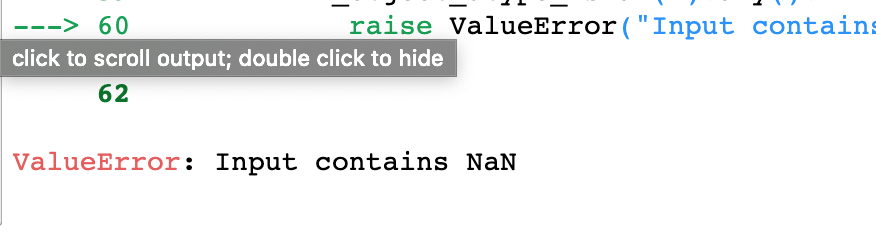

##### Train 데이터프레임을 받아서 행만 삭제한 새로운 데이터프레임 형태로 다음 분이 그대로 이어서 행 삭제할 수 있도록 함수화해주시면 되겠습니다.
*<example>*

*def row_clean(OLD_TRAIN_SET) :*

*.....*

*return NEW_TRAIN_SET*


### 2. FeatureEngineering
##### 모형에 들어갈 수 있고 변수가 의미를 가지도록 변수를 만질 수 있도록 해 주세요.
##### 이 과정도 함수화, Pipeline화해서 나중에 Tunning하기 좋게 하면 좋을 거 같아요.
##### FeatureEngineering해서 numpy형식으로 출력되도록 하는 게 좋을 것 같아요.


-----------
-----------


## FeatureEngineering on 
### weather var : 'tmprtr','prcpttn','wnd_spd','wnd_drctn','hmdt' 
### land_info : 'jmk','rgnl_ar_nm','rgnl_ar_nm2','lnd_us_sttn_nm','rd_sd_nm'

## 0. Setting

In [215]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer                           
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA

In [216]:
work_dir = '/Users/ieunpyo/PycharmProjects/Kaggle/gimhae_fire/'

train = pd.read_csv((work_dir + 'PJT002_train.csv'),encoding='utf-8' )
validation = pd.read_csv((work_dir + 'PJT002_validation .csv'),encoding='utf-8' )
# 일단 무거우니까 test_set 놔 둠.
# test_set = pd.read_csv((work_dir + '/' + 'PJT002_test.csv')

/Users/ieunpyo/anaconda3/envs/work/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. DB Cleaning

### 버릴 row 버리기

**지금은 비어 있지만, 계속 만져보면서 진짜 이상한 행들은 버리고 새로운 train set 정의하도록 하겠습니다.**

-------
-------

## 2. weather variables FeatureEngineering 

### step1 : select variable to drop

##### delete variable name from the weather_pipe_var_2

### step2 : imputer 

##### step2_1 : prcpttn_imputer - fillna(x) * imputing prcpttn's NA with x (x should be hyperparameter)
##### step2_2 : NA_imputer - IterativeImputer * imputing NAs with Iterative_imputer 
    
### step3 : scaler & PCA * scaling & pca
    


-----------------

In [217]:
train[weather_var].head()

prcpttn  tmprtr  wnd_spd  hmdt
0      NaN    10.7      0.9  96.0
1      NaN    19.5      0.5  74.0
2      NaN    15.5      2.0  21.0
3      NaN    20.6      0.4  91.0
4      NaN    12.7      0.6  89.0

In [218]:
# 만약 이 중 변수를 제거하고 싶으면 여기 리스트에서 이름을 삭제하면 된다.
# pipeline 안에 넣고 싶었지만 변수를 중간에 제거하는 것은 파이프라인에 안 들어간다. 도저히... 안된다고 한다...
weather_pipe_var_1 = ['prcpttn']
weather_pipe_var_2 = ['tmprtr','wnd_spd','wnd_drctn','hmdt'] 
weather_var = weather_pipe_var_1 + weather_pipe_var_2

weather_imputer = ColumnTransformer([
    ('prcpttn_imputer',SimpleImputer(strategy='constant',fill_value=-1),weather_pipe_var_1),
    ('otehrs_imputer',IterativeImputer(),weather_pipe_var_2)
     ])

weather_scale_PCA = Pipeline([
    ('Scaler',StandardScaler()),
    ('PCA',PCA())
])

weather_pipe = Pipeline([
    ('weather_imputer',weather_imputer),
    ('weather_scale_PCA',weather_scale_PCA)
    
])

In [219]:
weather_pipe.fit_transform(train[weather_var])

array([[ 0.83696482, -0.06593299,  0.27633869, -1.05562882, -0.48734151],
       [ 1.27023595, -0.08216013, -0.70304549,  0.42325286,  0.22044418],
       [-1.04874847, -0.52521494, -0.44697804,  1.40230662,  0.76804871],
       ...,
       [-1.28843737,  0.21226355, -0.011177  ,  0.03247435, -0.63159873],
       [ 0.11110034,  1.62059609,  0.87102948, -1.51675953,  0.06328016],
       [ 0.78164759,  0.23277003, -0.15921767, -0.97506574, -0.14958609]])

In [220]:
weather_pipe.get_params()

{'memory': None,
 'steps': [('weather_imputer',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('prcpttn_imputer',
                                    SimpleImputer(add_indicator=False, copy=True,
                                                  fill_value=-1,
                                                  missing_values=nan,
                                                  strategy='constant', verbose=0),
                                    ['prcpttn']),
                                   ('otehrs_imputer',
                                    IterativeImputer(add_indicator=False,
                                                     estimator=None,
                                                     imputation_order='ascending',
                                                     initial_strategy='mean',
                                                     max_iter=10, ma

.

## 3. land_info var FeatureEngineering

In [221]:
train.iloc[0:5,151:157] 

jmk      id rgnl_ar_nm rgnl_ar_nm2 lnd_us_sttn_nm rd_sd_nm
0   대  106536     자연녹지지역      지정되지않음             단독  세로한면(불)
1   대   86366     계획관리지역      지정되지않음             단독  세로한면(가)
2   답  107560  제2종일반주거지역      지정되지않음             연립     중로한면
3   대   97550  제1종일반주거지역      지정되지않음             단독  세로한면(불)
4   임  130501   자연환경보전지역      지정되지않음            자연림  세로한면(불)

In [222]:
land_info = ['jmk','rgnl_ar_nm','rgnl_ar_nm2','lnd_us_sttn_nm','rd_sd_nm']

In [239]:
# jmk 변수 다행히도 결측치 없다.
print(sum(train.jmk.isna()))

# rgnl_ar_nm : 1491개 결측치 존재
print(sum(train.rgnl_ar_nm.isna()))

# rgnl_ar_nm2 : 1491개 결측치 존재
print(sum(train.rgnl_ar_nm2.isna()))

# lnd_us_sttn_nm : 1776개 결측치 존재
print(sum(train.lnd_us_sttn_nm.isna()))

# rd_sd_nm : 1491개 결측치 존재
print(sum(train.rd_sd_nm.isna()))

0
1491
1491
1776
1491


In [245]:
print(len(train))
# rgnl_ar_nm 과 rgnl_ar_nm2 rd_sd_nm 세변수의 결측치 위치 같다. 심상치 않다. 왜 몰랐을까...
print(sum(train.rgnl_ar_nm.isna()==train.rgnl_ar_nm2.isna()))
print(sum(train.rgnl_ar_nm.isna()==train.rd_sd_nm.isna()))

59199
59199
59199


그렇다고 이런 결측치들이 뚜렷한 특징을 보이는 것도 아님...말그대로 그냥 누락된 것 같음.(가정!!!!! 질문해볼까???)

idea:
우선 지우기보다는 imputation해 보자.

bldng_ar	ttl_ar	lnd_ar	dt_of_athrztn	ttl_grnd_flr	...	no_tbc_zn_dstnc 등등 가용한 정보 많음.

imputation 방법을 hyperparameter로 놓자.

1) Knearest 머시기

2) logistic Regression, SVM 등등 결측치를 y변수로 놓고 돌려서 값채우기

...

-> 분명히 값이 잘 있는 애들도 많으니깐 그 중에서 가장 정확도 높은 놈을 imputation method로 정하자!



결측치만 잘 정리되면 one-hot 때려넣으면 되니까 어려울 거 없지



In [246]:
train.head()

dt_of_fr fr_yn bldng_us bldng_archtctr  bldng_cnt  bldng_ar  \
0  2017-10-20 05:54:00     Y     단독주택           블록구조          3     69.42   
1  2018-09-30 08:26:15     N      NaN            NaN          3     46.29   
2  2016-10-30 14:57:00     Y     공동주택       철근콘크리트구조          1    583.80   
3  2016-06-14 05:23:58     N     단독주택          일반목구조          2     48.92   
4  2018-04-22 05:38:59     N      NaN            NaN          2      0.00   

    ttl_ar  lnd_ar dt_of_athrztn  ttl_grnd_flr  ...  no_tbc_zn_dstnc  \
0    69.42     0.0          1977           1.0  ...               88   
1    46.29     0.0           NaN           1.0  ...             7727   
2  2516.76  1446.0   2.00011e+07           5.0  ...               72   
3    48.92     0.0          1936           1.0  ...              508   
4     0.00     0.0           NaN           NaN  ...              707   

  bldng_cnt_in_50m  trgt_crtr  fr_fghtng_fclt_spcl_css_5_yn  \
0                0        NaN                           NaN   
1                0        NaN                           NaN   
2               14        NaN                           NaN   
3               11        NaN                           NaN   
4                0        NaN                           NaN   

   fr_fghtng_fclt_spcl_css_6_yn  us_yn  dngrs_thng_yn  slf_fr_brgd_yn  \
0                           NaN    NaN            NaN             NaN   
1                           NaN    NaN            NaN             NaN   
2                           NaN    NaN            NaN             NaN   
3                           NaN    NaN            NaN             NaN   
4                           NaN    NaN            NaN             NaN   

   blk_dngrs_thng_mnfctr_yn  cltrl_hrtg_yn  
0                       NaN            NaN  
1                       NaN            NaN  
2                       NaN            NaN  
3                       NaN            NaN  
4                       NaN            NaN  

[5 rows x 180 columns]

In [223]:
train['rgnl_ar_nm'].unique()

array(['자연녹지지역', '계획관리지역', '제2종일반주거지역', '제1종일반주거지역', '자연환경보전지역', '보전관리지역',
       '일반상업지역', '생산관리지역', '준주거지역', '생산녹지지역', '농림지역', nan, '준공업지역',
       '일반공업지역', '근린상업지역', '제1종전용주거지역', '개발제한구역', '제3종일반주거지역',
       '제2종전용주거지역', '보전녹지지역', '유통상업지역', '중심상업지역', '관리지역', '용도미지정'],
      dtype=object)

In [230]:
OneHotEncoder().fit_transform(train[land_info])

ValueError: Input contains NaN